# Getting Started With `riweather`

In [1]:
import matplotlib.pyplot as plt
import riweather
%matplotlib inline

## Finding a weather station

Suppose you need weather data at a certain latitude and longitude. To list all weather stations in order of their distance to that site, use [`riweather.rank_stations`][].

In [2]:
my_lat, my_lon = 39.98, -105.13
ranked_stations = riweather.rank_stations(my_lat, my_lon)

In [3]:
print("Number of stations returned:", ranked_stations.shape[0])
ranked_stations.head()

Number of stations returned: 2868


,name,distance,latitude,longitude,years,quality
usaf_id,,,,,,
720534,ERIE MUNICIPAL AIRPORT,7971.794695,40.017,-105.050,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...","[low, high, high, high, high, high, high, high..."
724699,ATCT ROCKY MOUNTAIN METRO,8951.899139,39.900,-105.117,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...","[medium, medium, medium, medium, high, high, h..."
720533,BOULDER MUNICIPAL AIRPORT,9477.070760,40.033,-105.217,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[medium, high, high, high, high, high, high, h..."
720538,VANCE BRAND AIRPORT,21002.247034,40.167,-105.167,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[low, high, high, high, high, high, high, high..."
725650,DENVER INTERNATIONAL AIRPORT,43134.270016,39.847,-104.656,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...","[high, high, high, high, high, high, high, hig..."


This gives us the name and USAF identifiers of all ISD weather stations in the United States, along with their latitudes and longitudes and their distances (in meters) to the target site. The "years" column is a list of years for which there is available weather data from that station. The "quality" column contains the quality of the data file for the corresponding year---this is based on the number of observations in the file.

You probably don't need all of the thousands of weather stations that are returned, so let's be more efficient and limit our search to stations that have data for 2024 and are within 20 km of our site.

In [4]:
ranked_stations = riweather.rank_stations(
    my_lat,
    my_lon,
    year=2024,
    max_distance_m=20000,
)
ranked_stations

,name,distance,latitude,longitude,years,quality
usaf_id,,,,,,
720534,ERIE MUNICIPAL AIRPORT,7971.794695,40.017,-105.050,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...","[low, high, high, high, high, high, high, high..."
724699,ATCT ROCKY MOUNTAIN METRO,8951.899139,39.900,-105.117,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...","[medium, medium, medium, medium, high, high, h..."
720533,BOULDER MUNICIPAL AIRPORT,9477.070760,40.033,-105.217,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[medium, high, high, high, high, high, high, h..."


Erie Municipal Airport is the closest station. To access its weather data, first create a [`Station` object][riweather.Station] using its USAF ID.

In [5]:
station = riweather.Station("720534")
station.name

'ERIE MUNICIPAL AIRPORT'

Alternatively, use [`riweather.select_station`][], selecting the first station in the table by passing `rank=0`.

In [6]:
station = riweather.select_station(ranked_stations, rank=0)
station.name

'ERIE MUNICIPAL AIRPORT'

### Finding a station from a ZIP code

Only have a ZIP code for your site and not a precise latitude and longitude? No problem. If you pass a ZIP code to [`riweather.rank_stations`][] instead of lat/lon, it will rank the weather stations by their distances from the center point of the ZIP code tabulation area (ZCTA).

In [7]:
riweather.rank_stations(zipcode="80027").head()

,name,distance,latitude,longitude,years,quality
usaf_id,,,,,,
724699,ATCT ROCKY MOUNTAIN METRO,6901.277347,39.900,-105.117,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...","[medium, medium, medium, medium, high, high, h..."
720533,BOULDER MUNICIPAL AIRPORT,10206.621488,40.033,-105.217,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[medium, high, high, high, high, high, high, h..."
720534,ERIE MUNICIPAL AIRPORT,12169.752144,40.017,-105.050,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...","[low, high, high, high, high, high, high, high..."
720538,VANCE BRAND AIRPORT,24009.264942,40.167,-105.167,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[low, high, high, high, high, high, high, high..."
724695,BUCKLEY AIR FORCE BASE,43896.481997,39.717,-104.750,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...","[high, high, high, high, high, high, high, hig..."


Behind the scenes, this uses the function [`riweather.zcta_to_lat_lon`][] to determine the center point.

In [8]:
my_lat, my_lon = riweather.zcta_to_lat_lon("80027")
print(f"Latitude: {my_lat:.3f}, Longitude: {my_lon:.3f}")

Latitude: 39.951, Longitude: -105.164


## Visualizing weather stations on a map

We can verify the location of our site and the nearest weather stations by plotting them on an interactive map with [`riweather.plot_stations`][]. The pin represents the lat/lon site and the cloud icons represent the weather stations. Click on a station to see its name, and click on a line to see the distance between a station and the site.

!!! warning
    It's probably not a good idea to plot the entire set of 2,000+ stations on a map. Make sure `ranked_stations` is filtered down to a reasonable size first.

In [9]:
riweather.plot_stations(my_lat, my_lon, ranked_stations, distance_unit="mi")

## Fetching weather data

Let's see how complete we can expect the data to be when we pull it by looking at the [quality report][riweather.Station.quality_report].

In [10]:
station.quality_report()

,usaf_id,wban_id,year,quality,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,count,n_zero_months
0,720534,00161,2014,low,0,0,0,0,0,0,2191,2172,1869,2240,2160,2174,12806,6
1,720534,00161,2015,high,2232,1981,2226,2117,2244,2035,2232,2233,2084,2217,2151,2232,25984,0
2,720534,00161,2016,high,2240,2094,2239,2168,2255,2147,2203,2129,2173,2211,2164,2150,26173,0
3,720534,00161,2017,high,2143,1961,2213,2163,2061,2167,2204,2095,2172,2198,2888,2242,26507,0
4,720534,00161,2018,high,2219,2033,2272,2198,2523,2191,2292,2388,2125,2298,2217,2284,27040,0
5,720534,00161,2019,high,2279,2084,2255,2286,2432,2288,1780,1810,2088,2226,2169,2239,25936,0
6,720534,00161,2020,high,2056,2093,2234,2167,2232,2145,2096,2026,2161,2187,2160,2202,25759,0
7,720534,00161,2021,high,2227,2027,2245,2159,2232,2174,2168,2243,2098,2235,2145,2208,26161,0
8,720534,00161,2022,high,2237,2020,2152,2049,2232,2168,2250,2241,2160,2231,2169,2187,26096,0
9,720534,00161,2023,high,2246,2005,2245,2139,2250,2183,2253,2191,2160,2242,2138,2215,26267,0


The data for 2024 is `"high"` quality, with more than 2,000 observations in each month and no months that are missing. Assuming they are evenly spaced, that corresponds to one observation roughly every 20 minutes.

Now we can use [`riweather.Station.fetch_data`][] to get weather data. We need air temperatures in Fahrenheit for 2024, hour-ending to align with a set of electricity meter readings, in the US Mountain time zone.

In [34]:
ts = station.fetch_data(2024, datum="air_temperature", period="h", rollup="ending", tz="US/Mountain", temp_scale="F")
ts

,air_temperature.temperature_f
2023-12-31 18:00:00-07:00,33.176848
2023-12-31 19:00:00-07:00,29.726000
2023-12-31 20:00:00-07:00,25.415750
2023-12-31 21:00:00-07:00,22.736750
2023-12-31 22:00:00-07:00,20.876750
...,...
2024-12-31 13:00:00-07:00,34.328000
2024-12-31 14:00:00-07:00,35.445500
2024-12-31 15:00:00-07:00,35.640500
2024-12-31 16:00:00-07:00,34.249250


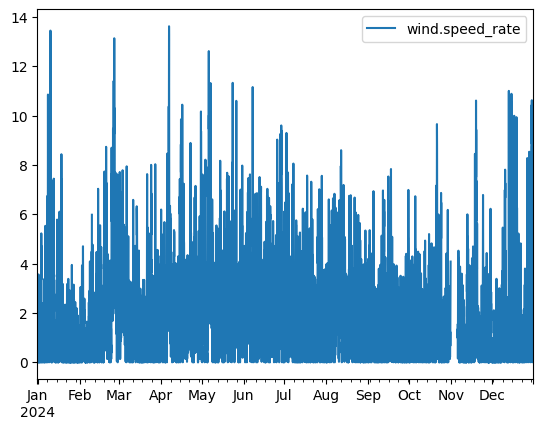

In [41]:
ts.plot()
plt.show()

Other data points may be available as well, depending on the weather station. For example, we can pull wind speed (in meters per second) as well:

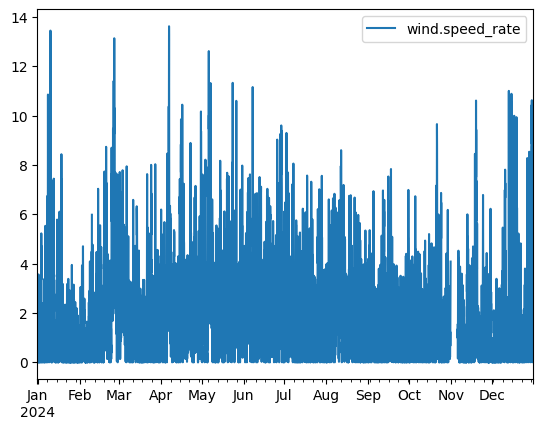

In [42]:
ts = station.fetch_data(2024, datum="wind", period="h", rollup="ending", tz="US/Mountain")
ts.plot()
plt.show()